# **Data Cleaning**

<span style="font-family:Georgia">

***"Garbage in, Garbage out"*** this is a popular phrase in the field of computer science. In the world of data science, this couldn't be more true. No matter how powerful your algorithms are, if your data is messy, your results will be messy too. That's where *data cleaning* comes in. 

### **What is Data Cleaning?**

Data cleaning is all about fixing errors, filling gaps, and orgainizing your data to make it ready for analysis. It's like organizing your desk before you start studying, you get rid of unnecessary stuff, put things in order, and make sure everything is in place.

### **Why is Data Cleaning Important?**

1. **Accuracy**: 

    Clean data means accurate results. If your data is messy, your results will be too.
2. **Efficiency**: 

    Clean data means faster analysis. You don't have to spend hours fixing errors and filling gaps.
3. **Reproducibility**: 

    Clean data means reproducible results. If your data is clean, anyone can replicate your analysis.


# **Steps in Data Cleaning**

## **1. Missing Values**



Missing values are common in real-world datasets. They can be represented in many ways, such as `NaN`, `NA`, `None`, or even an empty string `''`. 

**Types of Missing values:**

1. **MCAR (Missing Completely at Random)**: 

     MCAR is a specific type of missing data in which the probability of a data point being missing is entirely random and independent of any other variable in the dataset. In simpler terms, whether a value is missing or not has nothing to do with the values of other variables or the characteristics of the data point itself.

2. **MAR (Missing at Random)**:

    MAR is a type of missing data where the probability of a data point missing depends on the values of other variables in the dataset, but not on the missing variable itself. This means that the missingness mechanism is not entirely random, but it can be predicted based on the available information.

    Example: *Age field found to be missing for Female candidates in a survey, as they might not want to reveal their age.*

3. **MNAR (Missing Not at Random)**:

   MNAR is the most challenging type of missing data to deal with. It occurs when the probability of a data point being missing is related to the missing value itself. This means that the reason for the missing data is informative and directly associated with the variable that is missing.

   Example: *A survey asking about income might not be answered by people with low income.*

### **1.1. How to Handle Missing Values?**

Ignoring missing values can lead to biased results and decreased statistical power. Here are some common strategies to handle missing values:

1. **Deletion**: 

    - **Listwise Deletion**: 
        Delete rows with missing values.
    - **Dropping Variables**: 
        Drop columns with missing values.

2. **Imputation**:

    - **Mean/Median/Mode Imputation**: Replace missing values with the mean, median, or mode of the column.
    - **Random Imputation**: Randomly select a value from the column and assign it to the missing value.
    - **Imputation Using k-NN**: Use k-nearest neighbors to impute missing values.
    - **Predictive Imputation**: Use machine learning algorithms to predict missing values.

3. **Replacing with a Constant Value**: 

    Replace missing values with a predefined constant value.

4. **Interpolation**:

    Use interpolation techniques to estimate missing values.

5. **Use previous value**: 

    Fill missing values with the previous value in the column.

#### CODE

In [1]:
# Importing dataset and libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv("../0.Global_Dataset/Life Expectancy Data.csv")

#### Checking for missing values

In [10]:

print("List of missing Values \n",data.isnull().sum())
print("\nTotal number of missing values:",data.isnull().sum().sum())

List of missing Values 
 Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Total number of missing values: 2563


In [11]:
data.shape

(2938, 22)

#### List wise (row wise) deletion of missing values

In [21]:

data_drop_row_wise = data.dropna()
print(f"\nShape of data before dropping missing values: {data.shape}\nShape of data after dropping missing value row wise: {data_drop_row_wise.shape}")
print("Number of rows dropped: ",data.shape[0]-data_drop_row_wise.shape[0])



Shape of data before dropping missing values: (2938, 22)
Shape of data after dropping missing value row wise: (1649, 22)
Number of rows dropped:  1289


In [ ]:
data_drop_row_wise.isna().sum() # all the missing values are removed row wise

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

#### Column wise deletion of missing values

In [22]:
data_drop_column_wise = data.dropna(axis=1)
print(f"\nShape of data before dropping missing values: {data.shape}\nShape of data after dropping missing value column wise: {data_drop_column_wise.shape}")
print("Number of columns dropped: ",data.shape[1]-data_drop_column_wise.shape[1])


Shape of data before dropping missing values: (2938, 22)
Shape of data after dropping missing value column wise: (2938, 8)
Number of columns dropped:  14


In [16]:
data_drop_column_wise.isna().sum() # all the missing values are removed column wise

Country                   0
Year                      0
Status                    0
infant deaths             0
percentage expenditure    0
Measles                   0
under-five deaths         0
 HIV/AIDS                 0
dtype: int64

In column wise removal, we can see that columns got drastically reduced. This is not a good practice as we are losing a lot of information. Dropping the columns or the rows should be done only when the missing values are very high and cannot be imputed. 

## **Handling the missing value ( The Better way)**

We can handle missing value without losing much information by imputing the missing values. But one problem with this method is that it only works with numerical data.

#### **1.Filling missing values with mean of the column**

In [ ]:


#data_fill_mean = data.fillna(data.mean()) #try uncommenting this and run the code [ you will get error due to non numeric columns]


In [ ]:
data.dtypes # we can see only Country is object type and rest all are numeric

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [35]:
Data_numeric =  data.drop(columns=['Country','Status'])
Data_numeric_mean = Data_numeric.fillna(Data_numeric.mean())
print(f"\nShape of data before filling missing values: {Data_numeric.shape}\nShape of data after filling missing value with mean: {Data_numeric_mean.shape}")


Shape of data before filling missing values: (2938, 20)
Shape of data after filling missing value with mean: (2938, 20)


In [37]:
Data_numeric_mean.isna().sum() # all the missing values are filled with mean of the column

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

#### **2.Filling missing values with median of the column**

In [39]:
data_numeric_median = Data_numeric.fillna(Data_numeric.median())
print(f"\nShape of data before filling missing values: {Data_numeric.shape}\nShape of data after filling missing value with median: {data_numeric_median.shape}")
print("Number of missing values after filling with median: ",data_numeric_median.isna().sum().sum())


Shape of data before filling missing values: (2938, 20)
Shape of data after filling missing value with median: (2938, 20)
Number of missing values after filling with median:  0


#### **3.Filling missing values with mode of the column**

In [ ]:
Data_numeric_mode = Data_numeric.fillna(Data_numeric.mode().iloc[0])  
#why iloc[0] is used here?
#mode() returns the dataframe with the most frequent value in each column. So we need to extract the first row of the dataframe to get the most frequent value of each column 
#iloc[0] is used to extract the first row of the dataframe returned by mode() function.
print(f"\nShape of data before filling missing values: {Data_numeric.shape}\nShape of data after filling missing value with mode: {Data_numeric_mode.shape}")
print("Number of missing values after filling with mode: ",Data_numeric_mode.isna().sum().sum())



Shape of data before filling missing values: (2938, 20)
Shape of data after filling missing value with mode: (2938, 20)
Number of missing values after filling with mode:  0


#### **4.Filling missing values with a constant value**

In [46]:
# we can also use a constant value to fill the missing values. This value is known as fill_value

Data_numeric_fill_value = Data_numeric.fillna(0) #filling missing values with 0
print(f"\nShape of data before filling missing values: {Data_numeric.shape}\nShape of data after filling missing value with 0: {Data_numeric_fill_value.shape}")
print("Number of missing values after filling with 0: ",Data_numeric_fill_value.isna().sum().sum())



Shape of data before filling missing values: (2938, 20)
Shape of data after filling missing value with 0: (2938, 20)
Number of missing values after filling with 0:  0


#### **5.Filling missing values with the previous value or next value**

In [48]:
Data_numeric_preceding_value = Data_numeric.ffill()#filling missing values with preceding value
print(f"\nShape of data before filling missing values: {Data_numeric.shape}\nShape of data after filling missing value with preceding value: {Data_numeric_preceding_value.shape}")
print("Number of missing values after filling with preceding value: ",Data_numeric_preceding_value.isna().sum().sum())


Shape of data before filling missing values: (2938, 20)
Shape of data after filling missing value with preceding value: (2938, 20)
Number of missing values after filling with preceding value:  0


In [49]:
Data_numeric_succeeding_value = Data_numeric.bfill()#filling missing values with succeeding value
print(f"\nShape of data before filling missing values: {Data_numeric.shape}\nShape of data after filling missing value with succeeding value: {Data_numeric_succeeding_value.shape}")
print("Number of missing values after filling with succeeding value: ",Data_numeric_succeeding_value.isna().sum().sum())


Shape of data before filling missing values: (2938, 20)
Shape of data after filling missing value with succeeding value: (2938, 20)
Number of missing values after filling with succeeding value:  0


#### **6.Filling missing values with the interpolation method**

In [50]:
Data_numeric_interpolate = Data_numeric.interpolate()#filling missing values with interpolated value
print(f"\nShape of data before filling missing values: {Data_numeric.shape}\nShape of data after filling missing value with interpolated value: {Data_numeric_interpolate.shape}")
print("Number of missing values after filling with interpolated value: ",Data_numeric_interpolate.isna().sum().sum())


Shape of data before filling missing values: (2938, 20)
Shape of data after filling missing value with interpolated value: (2938, 20)
Number of missing values after filling with interpolated value:  0


#### **7.Filling missing values with the KNN imputer**

In [56]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=2)
Data_numeric_knn = knn_imputer.fit_transform(Data_numeric)
Data_numeric_knn = pd.DataFrame(Data_numeric_knn,columns=Data_numeric.columns)
print(f"\nShape of data before filling missing values: {Data_numeric.shape}\nShape of data after filling missing value with KNN: {Data_numeric_knn.shape}")
print("Number of missing values after filling with KNN: ",Data_numeric_knn.isna().sum().sum())



Shape of data before filling missing values: (2938, 20)
Shape of data after filling missing value with KNN: (2938, 20)
Number of missing values after filling with KNN:  0


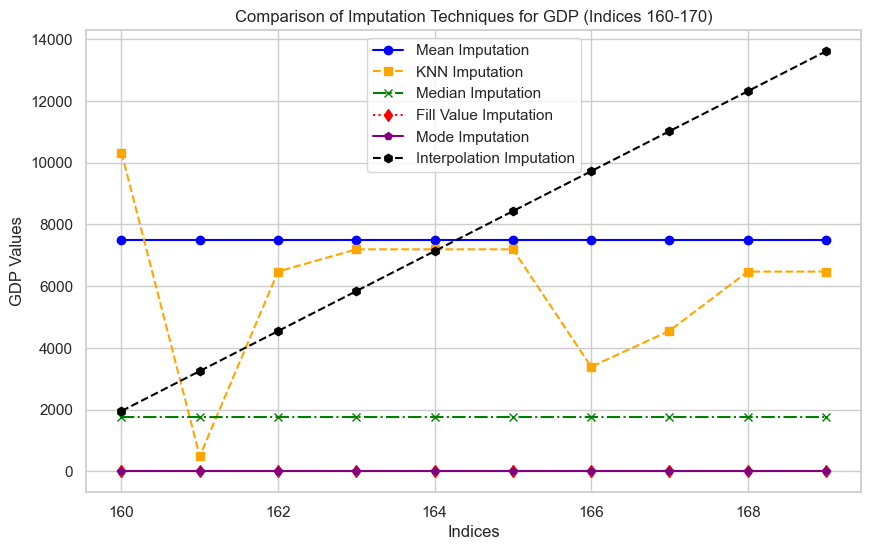

In [111]:
import matplotlib.pyplot as plt

# Data slices
x_indices = Data_numeric.index[160:170]
y_mean = Data_numeric_mean['GDP'].iloc[160:170]
y_median = data_numeric_median['GDP'].iloc[160:170]
y_mode = Data_numeric_mode['GDP'].iloc[160:170]
y_knn = Data_numeric_knn['GDP'].iloc[160:170]
y_fill_value = Data_numeric_fill_value['GDP'].iloc[160:170]
y_interpolate = Data_numeric_interpolate['GDP'].iloc[160:170]


# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_indices, y_mean, marker='o', linestyle='-', color='blue', label='Mean Imputation')
plt.plot(x_indices, y_knn, marker='s', linestyle='--', color='orange', label='KNN Imputation')
plt.plot(x_indices, y_median, marker='x', linestyle='-.', color='green', label='Median Imputation')
plt.plot(x_indices, y_fill_value, marker='d', linestyle=':', color='red', label='Fill Value Imputation')
plt.plot(x_indices, y_mode, marker='p', linestyle='-', color='purple', label='Mode Imputation')
plt.plot(x_indices, y_interpolate, marker='h', linestyle='--', color='black', label='Interpolation Imputation')

# Labels and title
plt.title("Comparison of Imputation Techniques for GDP (Indices 160-170)")
plt.xlabel("Indices")
plt.ylabel("GDP Values")
plt.legend()
plt.grid(True)
plt.show()


## **2. Duplicate Removal**

### **What is duplicate data?**

Duplicate data refers to any records or rows in a dataset that are identical or have the same values for some or all of the variables. Duplicate data can occur due to various reasons, such as human errors, data entry mistakes, data merging issues, or data scraping errors. Duplicate data can be classified into two types: exact duplicates and near duplicates. Exact duplicates are records that have the same values for all the variables, while near duplicates are records that have the same values for some but not all of the variables.

### **How to identify duplicate values?**

In case of python, we can use pandas library to identify the duplicate values. The `duplicated()` function in pandas returns a boolean series that indicates whether a row is a duplicate of a previous row. By using the `sum()` function on the boolean series, we can count the number of duplicate rows in the dataset.

### **How to handle duplicate data?**

The second step to handle duplicate data is to decide what to do with it. Depending on the type and source of the duplicates, the purpose and scope of your analysis, and the potential impact of the duplicates on your results, there are different options and strategies available. Deleting duplicate rows can reduce the size and complexity of your dataset, but it may also introduce bias. Keeping only one instance of the duplicate rows requires you to choose which one to keep and which ones to discard. Aggregating or averaging the duplicate rows can reduce noise or outliers in your data, but it may not reflect the true distribution or variation. Modifying or merging the duplicate rows can enhance or enrich your data, yet it may introduce errors or inconsistencies. Therefore, when making a decision about how to handle duplicate data, you should carefully consider all of these options and their potential implications.



In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r'..\0.Global_Dataset\Life Expectancy Data.csv')

In [8]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [12]:
# Creating a sample dataset set for demonstration
data = {
    'Name': ['John', 'Paul', 'John', 'George', 'Ringo'],
    'Age': [22, 25, 22, 24, 26],
    'City': ['New York', 'London', 'New York', 'Los Angeles', 'London']
}

df = pd.DataFrame(data)
print("Number of duplicates:", df.duplicated().sum())
print("\nOriginal DataFrame:")
print(df)

# Dropping duplicates
df_dropped = df.drop_duplicates()
print("\nDataFrame after dropping duplicates:")
print(df_dropped)



Number of duplicates: 1

Original DataFrame:
     Name  Age         City
0    John   22     New York
1    Paul   25       London
2    John   22     New York
3  George   24  Los Angeles
4   Ringo   26       London

DataFrame after dropping duplicates:
     Name  Age         City
0    John   22     New York
1    Paul   25       London
3  George   24  Los Angeles
4   Ringo   26       London


In [ ]:
# Conditional duplicates handling 
# Conditional duplicates handling means that we can specify a subset of columns based on which the duplicates will be checked and dropped.
# Creating a sample dataset set for demonstration
data = {
    'Name': ['John', 'Paul', 'John', 'George', 'Ringo'],
    'Age': [22, 25, 22, 24, 26],
    'City': ['New York', 'London', 'New York', 'Los Angeles', 'London']
}

df = pd.DataFrame(data)
print("\nOriginal DataFrame:")
print(df)

# Dropping duplicates based on a specific column
df_dropped = df.drop_duplicates(subset=['Name'])
print("\nDataFrame after dropping duplicates based on 'Name' column:")
print(df_dropped)




Original DataFrame:
     Name  Age         City
0    John   22     New York
1    Paul   25       London
2    John   22     New York
3  George   24  Los Angeles
4   Ringo   26       London

DataFrame after dropping duplicates based on 'Name' column:
     Name  Age         City
0    John   22     New York
1    Paul   25       London
3  George   24  Los Angeles
4   Ringo   26       London


## **3. Handling Outliers**

### **What are outliers?**

In statistics, any observations or data points that deviate significantly and do not conform with the rest of the observation or data points in a dataset are called outliers. Outliers are extreme values in a feature or dataset. For example, you have a dataset that contains list of students and their ages. Normally, the age of a student should be between 15 to 25 years. But if there is a student whose age is 80 years, then this data point is an outlier. Outliers are also called anomalies, novelties, noise, exceptions, or discordant observations.

### **Types of outliers**

- **Global Outliers**: 

    It is also called point anomaly. Any observations or data points are considered as global outliers if they deviate significantly from the rest of the observations or data points in a dataset. For example, if you are collecting observations of temperatures in a city, then a value of 100 degrees would be considered an outlier, as it is an extreme as well as impossible temperature value for a city.

- **Contextual Outliers**

    Any data points or observations are considered as contextual outliers if their value significantly deviates from the rest of the data points in a particular context. It means that the same values may not be considered an outlier in a different context. For example, if you have observations of temperatures in a city, then a value of 40 degrees would be considered an outlier in winter, but the same value might be part of the normal observations in summer.

- **Collective Outliers**

    Any group of observations or data points within a data set is considered collective outliers if these observations as a collection deviate significantly from the entire data set. It means that these values, individually without collection with other data points, are not considered as either contextual or global outliers.<br>
    For example, in an Intrusion Detection System, a DOS (denial-of-service) package from one computer to another may be considered normal behavior. However, if several computers are receiving DOS packages at the same time, then this may be considered anomalous behavior, and as a collection of data points, they can be considered collective outliers.

 

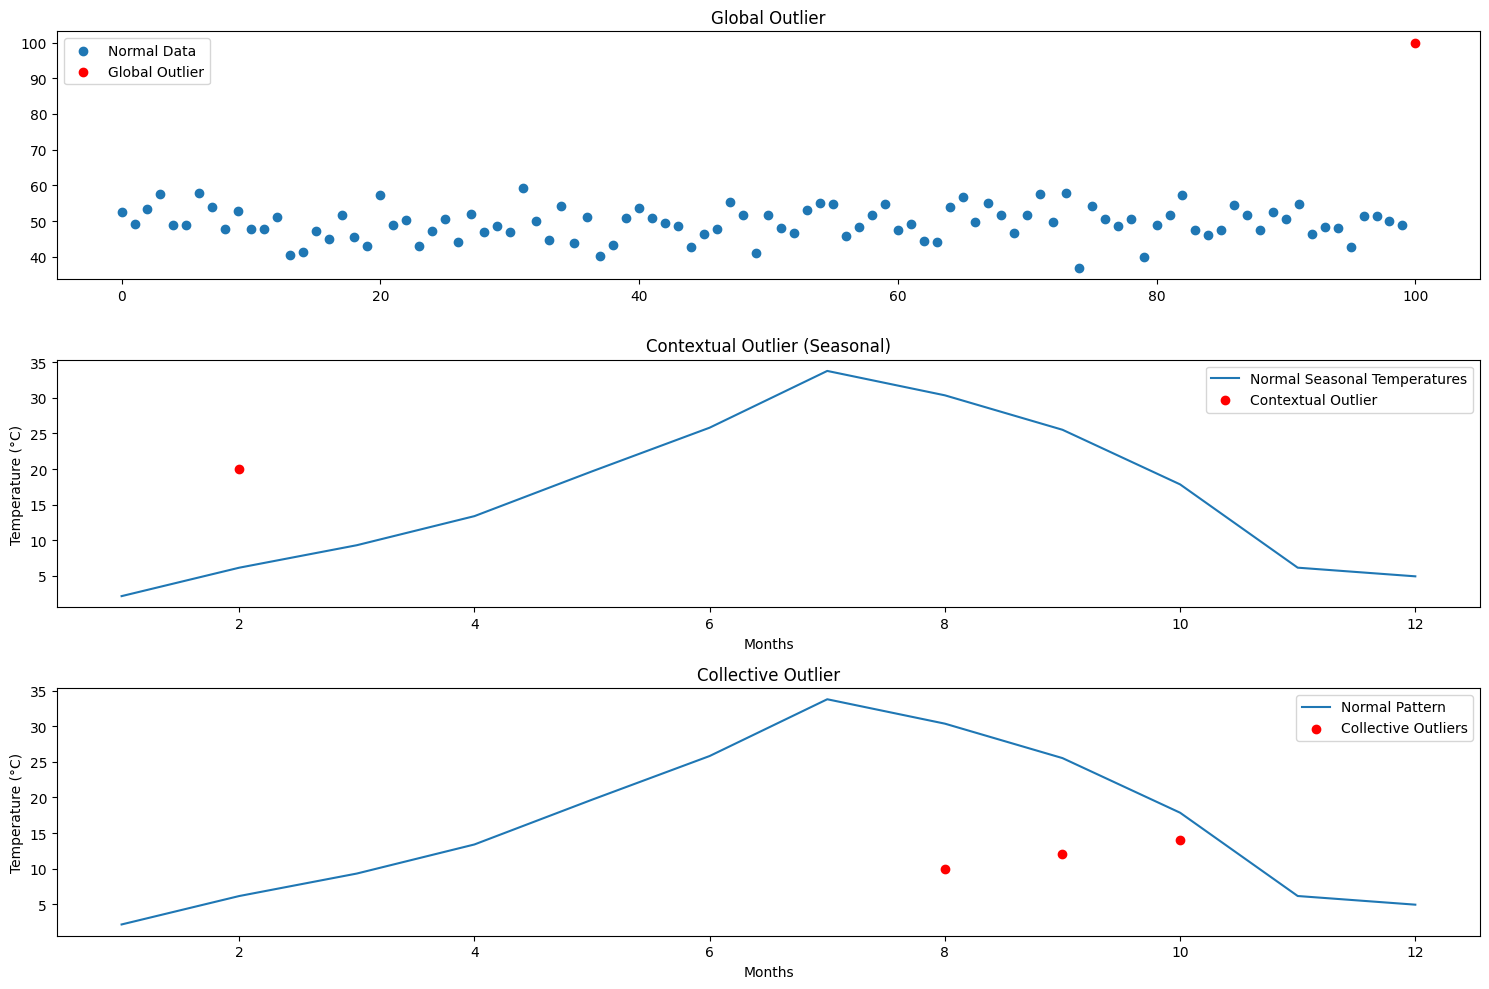

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
np.random.seed(42)

# Global Outlier: Far outside the range of the dataset
data_global = np.random.normal(loc=50, scale=5, size=100)
global_outlier = [100]  # Very high value as a global outlier

# Contextual Outlier: Appears normal globally but unusual in a specific context
months = np.arange(1, 13)  # Representing months of the year
temperature = [5, 7, 10, 15, 20, 25, 30, 30, 25, 18, 10, 5]  # Typical seasonal temperatures
temperature = np.array(temperature) + np.random.normal(0, 2, len(months))
temperature_with_contextual_outlier = temperature.copy()
temperature_with_contextual_outlier[1] = 20  # High temperature in February (winter) is anomalous

# Collective Outlier: Group of values deviating from a pattern
data_collective = temperature.copy()
data_collective[7:10] = [10, 12, 14]  # Group deviates from typical summer pattern

# Plot
plt.figure(figsize=(15, 10))

# Plot Global Outlier
plt.subplot(3, 1, 1)
plt.scatter(range(len(data_global)), data_global, label="Normal Data")
plt.scatter(len(data_global), global_outlier, color='red', label="Global Outlier")
plt.title("Global Outlier")
plt.legend()

# Plot Contextual Outlier
plt.subplot(3, 1, 2)
plt.plot(months, temperature, label="Normal Seasonal Temperatures")
plt.scatter(2, temperature_with_contextual_outlier[1], color='red', label="Contextual Outlier")
plt.title("Contextual Outlier (Seasonal)")
plt.xlabel("Months")
plt.ylabel("Temperature (°C)")
plt.legend()

# Plot Collective Outlier
plt.subplot(3, 1, 3)
plt.plot(months, temperature, label="Normal Pattern")
plt.scatter(months[7:10], data_collective[7:10], color='red', label="Collective Outliers")
plt.title("Collective Outlier")
plt.xlabel("Months")
plt.ylabel("Temperature (°C)")
plt.legend()

plt.tight_layout()
plt.show()


### **Identifying Outliers**

These are some common methods to identify outliers:

- **Z-Score**: 

    The Z-score is a statistical measure that tells you how far is a data point from the mean of the dataset. It measures the number of standard deviations a data point is from the mean. If the Z-score of a data point is greater than 3 or less than -3, then it is considered as an outlier.

- **IQR (Interquartile Range)**:

    The IQR is a measure of statistical dispersion, or in simple terms, it tells you how spread out the data is. It is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. Any data point that falls below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is considered as an outlier.

- **Isolation Forest**

    Isolation Forest is an unsupervised learning algorithm that is based on the Decision Tree algorithm. It isolates the outliers by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The number of splits required to isolate the outlier is used as a measure of abnormality.

        Value   Z-Score  Outlier_Z  Outlier_IQR  Outlier_IF
0   54.967142  0.343497      False        False       False
1   48.617357 -0.022117      False        False       False
2   56.476885  0.430426      False        False       False
3   65.230299  0.934439      False        False       False
4   47.658466 -0.077329      False        False       False
5   47.658630 -0.077320      False        False       False
6   65.792128  0.966788      False        False       False
7   57.674347  0.499375      False        False       False
8   45.305256 -0.212824      False        False       False
9   55.425600  0.369894      False        False       False
10  45.365823 -0.209337      False        False       False
11  45.342702 -0.210668      False        False       False
12  52.419623  0.196813      False        False       False
13  30.867198 -1.044153      False        False       False
14  32.750822 -0.935696      False        False       False


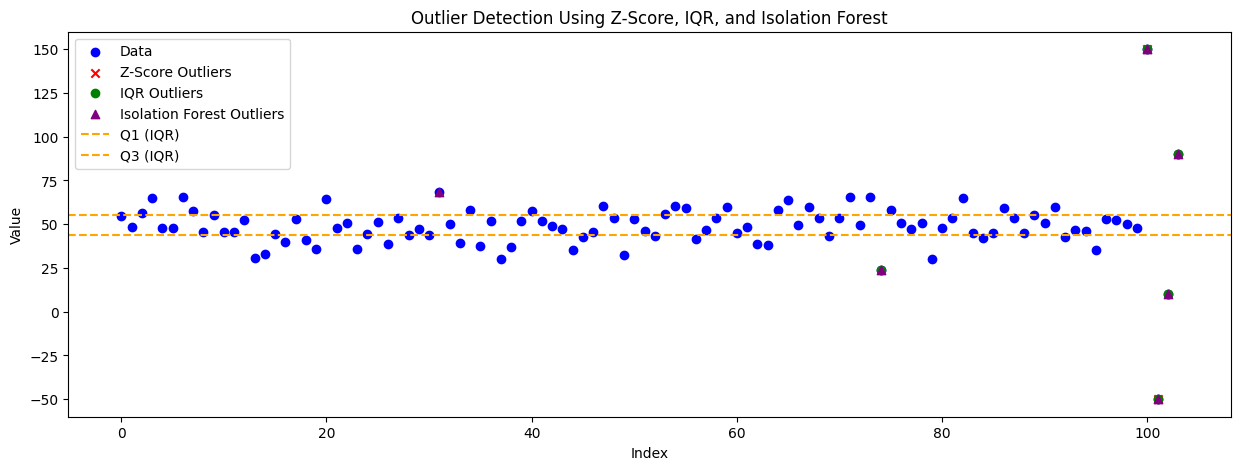

In [47]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore

# Generate synthetic data
np.random.seed(42)
data = np.random.normal(50,10,100).tolist()
data.extend([150,-50,10,90])


# Convert to DataFrame for convenience
df = pd.DataFrame(data, columns=['Value'])

### 1. Z-Score Method
df['Z-Score'] = zscore(df['Value'])
df['Outlier_Z'] = (abs(df['Z-Score']) > 3)  # Threshold of 3 for outliers

### 2. IQR Method
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Outlier_IQR'] = (df['Value'] < lower_bound) | (df['Value'] > upper_bound)

### 3. Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Outlier_IF'] = iso_forest.fit_predict(df[['Value']])
df['Outlier_IF'] = df['Outlier_IF'].apply(lambda x: x == -1)  # -1 indicates outlier

# Display Results
print(df.head(15))  # Display first 15 rows

# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Plot original data
plt.scatter(df.index, df['Value'], label='Data', c='blue')

# Highlight outliers by each method
plt.scatter(df[df['Outlier_Z']].index, df[df['Outlier_Z']]['Value'], color='red', label='Z-Score Outliers', marker='x')
plt.scatter(df[df['Outlier_IQR']].index, df[df['Outlier_IQR']]['Value'], color='green', label='IQR Outliers', marker='o')
plt.scatter(df[df['Outlier_IF']].index, df[df['Outlier_IF']]['Value'], color='purple', label='Isolation Forest Outliers', marker='^')

plt.axhline(Q1, color='orange', linestyle='--', label='Q1 (IQR)')
plt.axhline(Q3, color='orange', linestyle='--', label='Q3 (IQR)')
plt.title("Outlier Detection Using Z-Score, IQR, and Isolation Forest")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()


### **Handling Outliers**

These are following methods to handle outliers:

- **Removing outliers**: 

    One of the simplest ways to handle outliers is to remove them from the dataset. However, this method should be used with caution, as removing outliers can lead to loss of valuable information and can affect the overall distribution of the data.

- **Transforming the data**:

    Another way to handle outliers is to transform the data using mathematical functions such as logarithm, square root, or reciprocal. This can help to reduce the impact of outliers on the analysis.

- **Imputing outliers**:
    
    Outliers can also be imputed using statistical methods such as mean, median, or mode imputation. This can help to replace the outliers with more representative values. This is like filling the missing values.
    



In [78]:
data = {'value': [-6,1, 4, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 40, 56, 73, 176]}
df = pd.DataFrame(data)
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3-Q1
lower_b=Q1-1.5*IQR
upper_b=Q3+1.5*IQR

## Identifying the outliers

outliers = df[(df['value']<lower_b) | (df['value']>upper_b)]
print("Initial Outlier: ", outliers)

## Transforming the outliers

df['value'] = np.log10(df['value'])
#againg checking for outliers
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3-Q1
lower_b=Q1-1.5*IQR
upper_b=Q3+1.5*IQR
new_outlers = df[(df['value']<lower_b) | (df['value']>upper_b)]
print("Outliers after transformation: ", new_outlers)



Initial Outlier:      value
0      -6
13     40
14     56
15     73
16    176
Outliers after transformation:         value
1   0.000000
2   0.602060
15  1.863323
16  2.245513


c:\Users\sachi\anaconda3\envs\Data_Pre\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### **Using imputation techniques to handle outliers**

In [93]:
# Replace the outliers with the median value

df = pd.DataFrame(data)
median =  df['value'].median()
df['Imputed_value'] = df['value'].apply(lambda x: median if (x < lower_b or x > upper_b) else x)

In [104]:
# Using interpolation
df = pd.DataFrame(data)
# Interpolation for outliers
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3-Q1
lower_b=Q1-1.5*IQR
upper_b=Q3+1.5*IQR
df['Imputed_Interpolated'] = df['value']
df.loc[(df['value'] < lower_b) | (df['value'] > upper_b), 'Imputed_Interpolated'] = np.nan
df['Imputed_Interpolated'] = df['Imputed_Interpolated'].interpolate()
print(df)


    value  Imputed_Interpolated
0      -6                   NaN
1       1                   1.0
2       4                   4.0
3      11                  11.0
4      12                  12.0
5      13                  13.0
6      14                  14.0
7      15                  15.0
8      16                  16.0
9      17                  17.0
10     18                  18.0
11     19                  19.0
12     20                  20.0
13     40                  20.0
14     56                  20.0
15     73                  20.0
16    176                  20.0
